In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt

plt.style.use('ggplot')

## Load Data

In [2]:
df_temperatures = read_csv('../daily-temperatures.csv', header=0, index_col=0)

In [3]:
df_temperatures.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


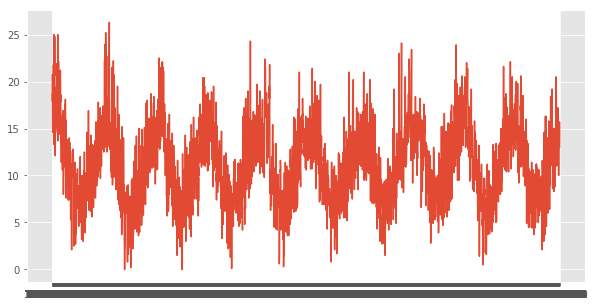

In [4]:
plt.figure(figsize=(10,5))
plt.plot(df_temperatures)
plt.show()

## Deseasonalize by Differencing

In [5]:
difference = list()
X = df_temperatures.values
days_in_year = 365 # the data consists of yearly seasonal components

for index in range(1, len(X)):
    # print(f'index: {index}, X: {X[index]}, X-1: {X[index-1]}')
    value = X[index] - X[index-days_in_year]
    difference.append(value)

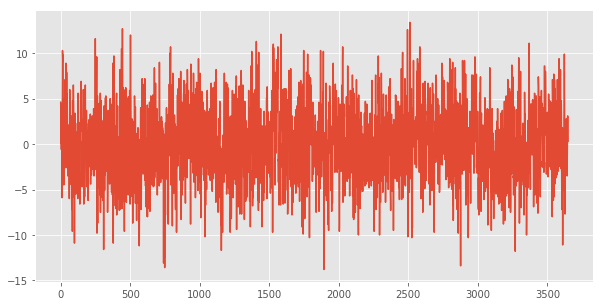

In [6]:
# plot the deseasonalized time series
plt.figure(figsize=(10,5))
plt.plot(difference)
plt.show()

## Deseasonalize by Model Fitting

In [7]:
import numpy as np

In [8]:
X = [i%days_in_year for i in range(0, len(df_temperatures))]
y = df_temperatures.values

degree = 4 # y = x^4*b1 + x^3*b2 + x^2*b3 + x^1*b4 + b5
coef = np.polyfit(X, y, degree)
curve = list()

In [9]:
for index in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[index]**(degree-d) * coef[d]
    curve.append(value)

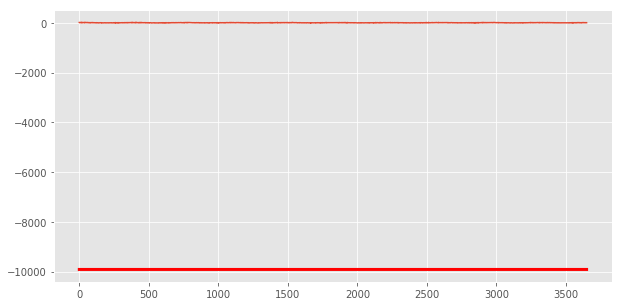

In [10]:
# plot the curve over original data
plt.figure(figsize=(10,5))
plt.plot(df_temperatures.values)
plt.plot(curve, color='red', linewidth=3) # there is a bug on curve
plt.show()

---